In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from sklearn.model_selection import train_test_split

### Задача 16

По описанию условий посева предсказать прорастут семена растений или нет. Провести бинарную классификацию семян с помощью метода Парзеновского окна. Построить график зависимости ошибки на контроле от ширины окна. Подобрать оптимальную ширину окна.

In [2]:
columns = ['season',  'age', 'childish diseases', 'accident',  'surgical intervention', 'high fevers', 
'frequency of alcohol consumption', 'smoking habit', 'number of hours spent sitting per day', 'output']

In [3]:
df = pd.read_csv('fertility_Diagnosis.txt', names = columns)
df['output'] = df['output'] == 'N'
df.head()

,season,age,childish diseases,accident,surgical intervention,high fevers,frequency of alcohol consumption,smoking habit,number of hours spent sitting per day,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,True
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,False
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,True
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,True
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,False


In [4]:
len(df)

100

In [5]:
np.sum(df['output'])

88

С самого начала мочется объединить признаки 'Season' и 'age', создав один временной ряд, но это будет не совсем корректно: в первом случае имеем периодическое явление, а во втором графа "год" соответствует скорее категориальному признаку: был ли тот или иной год благоприятным для растений, скорее, независимая случайная величина. Но откажемся и от перехода к категриальным признакам: это слишком сильно повысит размерность нашего простанства.

In [6]:
X = df.drop('output', axis = 1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [19]:
epan = lambda r : 3 / 4 * (1 - r ** 2) * (np.abs(r) <= 1)
square = lambda r : 15 / 16 * (1 - r ** 2) ** 2 * (np.abs(r) <= 1)
triangle = lambda r :  (1 - np.abs(r)) * (np.abs(r) <= 1)
gaussean = lambda r : (2 * np.pi) ** (-1 / 2) * np.exp(-1 / 2 * r ** 2)
rectangular = lambda r : 0.5 * (np.abs(r) <= 1)
kernels = [epan, square, triangle, gaussean, rectangular]
kernel_names = ['epan', 'square', 'triangle', 'gaussean', 'rectangular']

In [20]:
X_pos = X_train[y_train]
X_neg = X_train[~y_train]

def get_prices(X, h=1.7, K=epan):
    dists = distance_matrix(X, X_test)
    dists = K( dists / h)
    return dists.sum(axis = 0)

def get_error(h=1.7, K=epan):
    answer = get_prices(X_pos, h, K) >= get_prices(X_neg, h, K)
    return np.sum(answer != y_test) / len(answer)

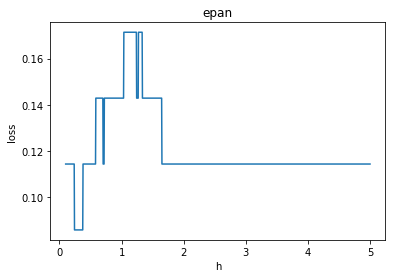

optimumal h =  0.24224224224224225


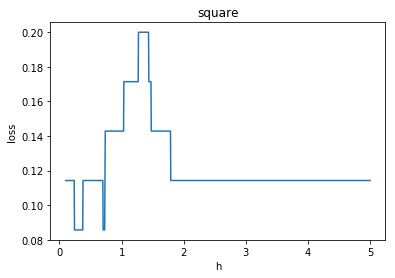

optimumal h =  0.24224224224224225


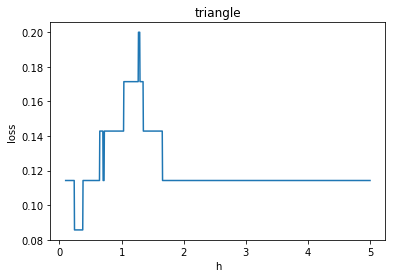

optimumal h =  0.24224224224224225


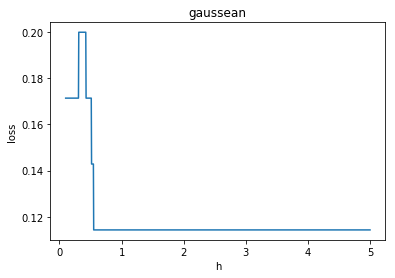

optimumal h =  0.5512512512512513


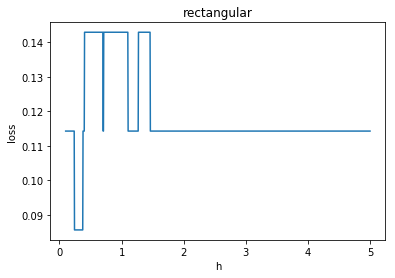

optimumal h =  0.24224224224224225


In [29]:
h_es = np.linspace(0.1, 5, 1000)

for kernel, name in zip(kernels, kernel_names):
    accuracies = []
    for h in h_es:
        accuracies.append(get_error(h, kernel))
    plt.plot(h_es, accuracies)
    plt.title(name)
    plt.xlabel('h')
    plt.ylabel('loss')
    plt.show()
    print('optimumal h = ', h_es[np.argmin(accuracies)])

Автор бы на стал придавать сильной статической значимости данным результатам, т. к. датасет очень маленький, и мы не можем сдалать даже валидирующую выборку. Дискретный характер поведения функции потерь,"дерганое" поведение  говорит на о том, что, скорее всего, мы просто подогнались к конкретным данным. 